# Life Events and Disorders

### Description and Purpose:
I was taking a modeling course not too long ago and stumbled upon a very basic algebra equation. The new way it was positioned made me curious about how different types of distributions can have practical purposes. 

The example given was around luck vs skill, and how luck can play a large role even in environments where skill seems like it should dominate. I thought if this is possible in sports or careers, why can't this be possible in mental health? 

What follows is a very basic approach to a very complicated problem. It demonstrates how even in the most unlikely of people we still find some individuals will, at some point in their life, fall victim to some form of a mental health issue.

### Equation:

Foundamentally, I wanted to answer, "What is the probability of getting a mental health disease given a certain number of 'life events' with a fixed sensitivity to those events?" In other words, if there are a certain number of events that each individual can take, and that threshold is different for each person, what is the average number of life events to reflect something realistic in society. That led me to apply a very basical algebra equation:

$$P(y) = [(a*i)+\psi]*100$$

I used $y$ as my probability variable which I'm solving. By applying a responsiveness multiplier, $a$, to each life event, $i$, plus an initial probability of receiving a mental health issue, $\psi$. I was able to determine, through iteration, what the probability of a total population experiencing a mental health disease. _More importantly_, the distributions for each on those variables plays a key role in understanding mental health and the indiscriminate nature which it occurs.

       Initial Probability  Life Events  Probability of Disorder  \
count          1000.000000  1000.000000              1000.000000   
mean              0.087085     1.946000                20.074200   
std               0.079661     1.423063                26.194609   
min               0.000098     0.000000                 0.009789   
25%               0.028158     1.000000                 4.544876   
50%               0.066103     2.000000                10.200099   
75%               0.120189     3.000000                20.864126   
max               0.517357     7.000000               100.000000   

       Responsiveness  
count     1000.000000  
mean         0.081324  
std          0.185623  
min          0.000000  
25%          0.000001  
50%          0.000539  
75%          0.042026  
max          0.996275  


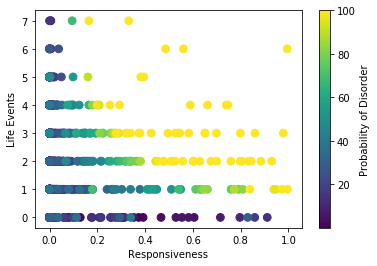

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
pd.set_option('float_format',lambda x: "%.6f" % x)

life_events = np.random.poisson(2,1000)
responsiveness = np.random.power(.1,1000)
initial_prob = np.random.beta(1,10,1000)
df = pd.DataFrame()

for i,α,ψ in zip(life_events, responsiveness, initial_prob):
    p = ((α*i)+ψ)*100
    if p > 100:
        df = df.append({"Life Events": i, "Responsiveness": α, "Initial Probability": ψ, "Probability of Disorder": 100}, ignore_index = True)
    elif i == 0:
        p = (ψ)*100
        df = df.append({"Life Events": i, "Responsiveness": α, "Initial Probability": ψ, "Probability of Disorder": p}, ignore_index = True)
    else:
        df = df.append({"Life Events": i, "Responsiveness": α, "Initial Probability": ψ, "Probability of Disorder": p}, ignore_index = True)

df = df.sort_values(by = "Probability of Disorder")
fig, ax = plt.subplots()
df.plot(kind='scatter', 
        x='Responsiveness', 
        y='Life Events', 
        s=60, 
        c='Probability of Disorder', 
        cmap='viridis', 
        ax=ax)

print(df.describe())

As expected, the more life events the higher the probability of getting a mental health disorder. The higher a responsiveness to a life event, the more likely to develop a mental health disorder.

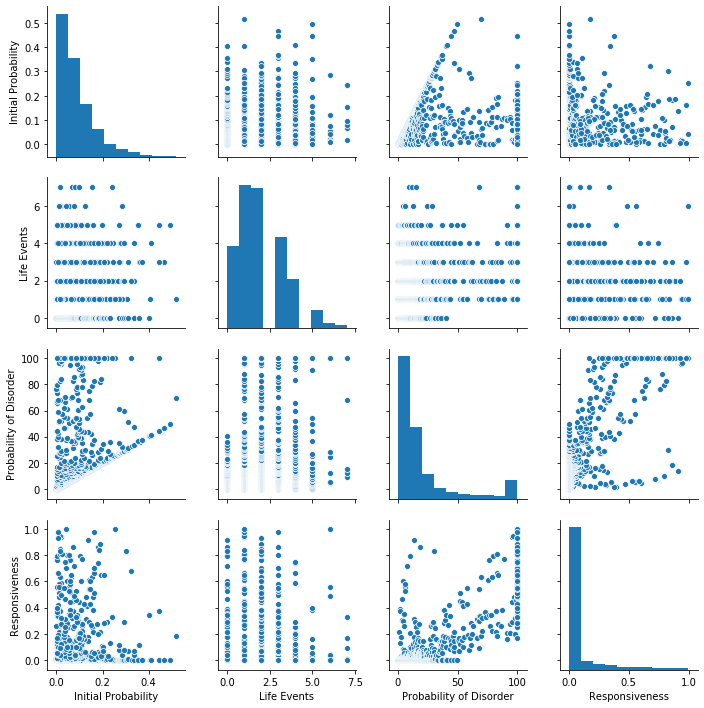

In [3]:
import seaborn as sns
from scipy.stats import norm

sns.pairplot(df, kind="scatter", palette="Set2")
plt.show()

C:\Users\deram\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


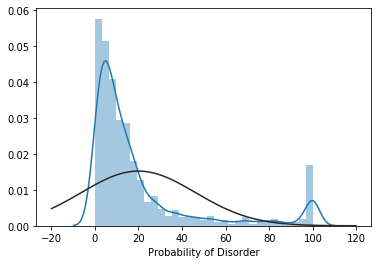

In [4]:
sns.distplot(df["Probability of Disorder"], fit = norm)